# **Predecir el Precio de las Acciones de TD con Support Vector Regression (SVR)**

## Importar dependencias

In [ ]:
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 
import pandas as pd 

%matplotlib inline

## Preparar los datos

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

from pandas_datareader import data as pdr
#El módulo pandas_datareader, importa datos en un DataFrame de pandas fácilmente digerible.

yf.pdr_override() # arreglamos el data reader de Yahoo

# Descargamos el Dataset, donde Los precios son del 01-01-2019 al 30-01-2019.
df = pdr.get_data_yahoo("TD.TO", start="2019-01-01", end="2019-01-31")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,67.510002,68.430000,67.120003,68.250000,58.394650,3930300
2019-01-03,68.110001,68.110001,67.120003,67.300003,57.581837,5407700
2019-01-04,68.000000,68.150002,67.669998,67.980003,58.163643,5103400
2019-01-07,68.589996,68.589996,67.449997,67.690002,57.915512,5907000
2019-01-08,68.000000,68.190002,67.330002,67.820000,58.026737,7337200


In [ ]:
# Creamos la variable Date que tendrá las fechas
# que por defecto se muestran como indices 
# Extraemos los indices y lo convertimos en String con el metodo astype(str)
df['Date'] =  df.index.astype(str)
df

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-01-02,67.510002,68.430000,67.120003,68.250000,58.394650,3930300,2019-01-02
2019-01-03,68.110001,68.110001,67.120003,67.300003,57.581837,5407700,2019-01-03
2019-01-04,68.000000,68.150002,67.669998,67.980003,58.163643,5103400,2019-01-04
2019-01-07,68.589996,68.589996,67.449997,67.690002,57.915512,5907000,2019-01-07
2019-01-08,68.000000,68.190002,67.330002,67.820000,58.026737,7337200,2019-01-08
2019-01-09,67.500000,68.410004,67.379997,68.139999,58.882236,5124400,2019-01-09
2019-01-10,68.199997,68.870003,67.779999,68.800003,59.452564,3953000,2019-01-10
2019-01-11,68.839996,68.860001,68.330002,68.860001,59.504421,3519700,2019-01-11
2019-01-14,68.739998,69.050003,68.559998,68.650002,59.322956,3248300,2019-01-14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2019-01-02 to 2019-01-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       21 non-null     float64
 1   High       21 non-null     float64
 2   Low        21 non-null     float64
 3   Close      21 non-null     float64
 4   Adj Close  21 non-null     float64
 5   Volume     21 non-null     int64  
 6   Date       21 non-null     object 
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
# Con esta función obtenemos el día de la variable Date (string)
def get_data(df):  
    data = df.copy()
    data['Date'] = data['Date'].str.split('-').str[2]
    data['Date'] = pd.to_numeric(data['Date'])
    return [ data['Date'].tolist(), data['Close'].tolist() ]

dates, prices = get_data(df)

print(dates, prices)


[2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 28, 29, 30] [68.25, 67.30000305175781, 67.9800033569336, 67.69000244140625, 67.81999969482422, 68.13999938964844, 68.80000305175781, 68.86000061035156, 68.6500015258789, 69.33000183105469, 70.62999725341797, 71.33999633789062, 72.33999633789062, 72.9000015258789, 72.41000366210938, 72.19999694824219, 72.66000366210938, 72.83000183105469, 73.16999816894531, 73.70999908447266, 73.7300033569336]


## Creamos los tres modelos para realizar las Predicciones

* lineal, 
* polinómico y 
* función básica radial (núcleo por defecto para SVR)



Utilizaremos los datos de fecha y precios de cierre para predecir el Precio de Cierre de la próxima fecha de la accione de TD que es el 2019-01-31 

In [1]:
# Creamos una función que realizará la predicción y el trazado

def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # convirtiendo en matriz de n X 1
    x = np.reshape(x,(len(x), 1))
    
    # Definición de los modelos de Support Vector Regression (SVR)
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    # Ajustar los parámetros de regresión lineal a los datos con fit()
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    # Trazar el diagrama de dispersión con scatter() para comparar los valores de dates vs prices
    plt.scatter(dates, prices, c='k', label='Data')

    # Trazando la línea hecha por el kernel RBF
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')

    # Trazando la línea hecha por el kernel lineal 
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')  

    # Trazando la línea hecha por el kernel Polinómico   
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    
    # Definimos el texto para las etiquetas
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

## Obtenemos la predicción y trazamos los modelos predictivos

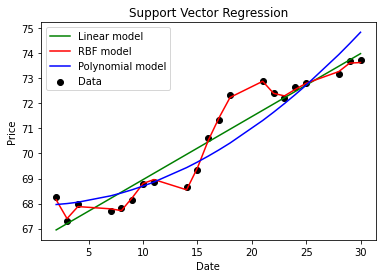

In [ ]:
predicted_price = predict_prices(dates, prices, [31])

In [ ]:
predicted_price

(73.18055746816138, 74.23818331643184, 75.30889069640483)

Si queremos verificar los precios de cierre de las acciones de TD el 31 de enero de 2019

In [ ]:
price = pdr.get_data_yahoo("TD.TO", start="2019-01-31", end="2019-02-1")
print(price['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-01-31    74.0
Name: Close, dtype: float64
